In [268]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
train = pd.read_csv("D:\\Datasets\\Logistic Regression\\train.csv")
GS =pd.read_csv("D:\\Datasets\\Logistic Regression\\gender_submission.csv")

In [269]:
train.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [270]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [271]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Gender         891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [272]:
for col in train.columns:
    print(col,train[col].isnull().sum())

PassengerId 0
Survived 0
Pclass 0
Name 0
Gender 0
Age 177
SibSp 0
Parch 0
Ticket 0
Fare 0
Cabin 687
Embarked 2


In [273]:
GS.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [274]:
for col in GS.columns:
    print(col,GS[col].isnull().sum())

PassengerId 0
Survived 0


In [275]:
GS.describe()

,PassengerId,Survived
count,418.000000,418.000000
mean,1100.500000,0.363636
std,120.810458,0.481622
min,892.000000,0.000000
25%,996.250000,0.000000
50%,1100.500000,0.000000
75%,1204.750000,1.000000
max,1309.000000,1.000000


In [276]:
GS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
PassengerId    418 non-null int64
Survived       418 non-null int64
dtypes: int64(2)
memory usage: 6.7 KB


In [277]:
train.shape

(891, 12)

Survived: The Survived variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive. All other variables are potential predictor or independent variables.
PassengerID and Ticket: The PassengerID and Ticket variables are assumed to be random unique identifiers, that have no impact on the outcome variable. Thus, they will be excluded from analysis.
Pclass: The Pclass variable is an ordinal datatype for the ticket class, a proxy for socio-economic status (SES), representing 1 = upper class, 2 = middle class, and 3 = lower class.
Name: The Name variable is a nominal datatype. It could be used in feature engineering to derive the gender from title, family size from surname, and SES from titles like doctor or master. Since these variables already exist, we'll make use of it to see if title, like master, makes a difference.
Sex and Embarked: The Sex and Embarked variables are a nominal datatype. They will be converted to dummy variables for mathematical calculations.
Age and Fare: The Age and Fare variable are continuous quantitative datatypes.
SibSp: The SibSp represents number of related siblings/spouse aboard and Parch represents number of related parents/children aboard. Both are discrete quantitative datatypes. This can be used for feature engineering to create a family size and is alone variable.
Cabin: The Cabin variable is a nominal datatype that can be used in feature engineering for approximate position on ship when the incident occurred. However, since there are many null values, it does not add value and thus is excluded from analysis.

# Exploring the columns

# 1. Survived Ones

Survived: The Survived variable is our outcome or dependent variable. It is a binary nominal datatype of 1 for survived and 0 for did not survive. All other variables are potential predictor or independent variables.

In [278]:
survived = train['Survived']

In [279]:
survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [280]:
survived.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [281]:
data = survived.value_counts()
print(data)

0    549
1    342
Name: Survived, dtype: int64


In [282]:
labels = ['no','yes']

In [283]:
colors = ['blue','yellow']

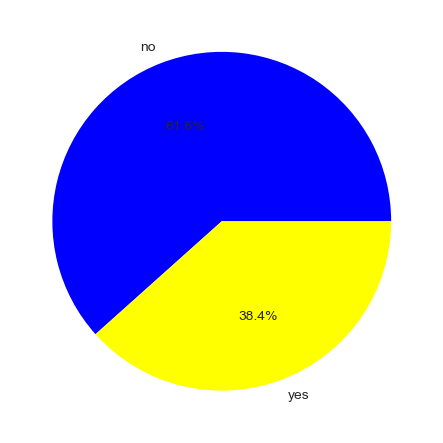

In [284]:
#MAKING A PIE CHART FOR VISUALIZATION
plt.pie(data,labels = labels,colors=colors,autopct='%1.1f%%')
plt.show()

So we have visualize that 61.6% dies and 38.4% survived if we assume all were dead our accuracy will be about 62%

In [285]:
survived = pd.DataFrame(survived)

In [286]:
survived.shape

(891, 1)

In [287]:
survived.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
Survived    891 non-null int64
dtypes: int64(1)
memory usage: 7.1 KB


In [288]:
survived.describe()

,Survived
count,891.000000
mean,0.383838
std,0.486592
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


how to download pandas_profiling 
--> conda install -c conda-forge pandas-profiling (using anaconda)
--> pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (using pip)

# Complete report of data using pandas profiling

In [289]:
import pandas_profiling
pandas_profiling.ProfileReport(train)

C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas_profiling\describe.py:404: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


Number of variables,12
Number of observations,891
Total Missing (%),8.1%
Total size in memory,83.7 KiB
Average record size in memory,96.1 B
Numeric,6
Categorical,4
Boolean,1
Date,0
Text (Unique),1
Rejected,0


In [290]:
'''import plotly
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, iplot'''

'import plotly\nimport plotly.graph_objs as go\nfrom plotly.offline import init_notebook_mode, iplot'

In [291]:
'''col = "Sex"
grouped = train[col].value_counts().reset_index()
grouped = grouped.rename(columns = {col : "count", "index" : col})

## plot
trace = go.Pie(labels=grouped[col], values=grouped['count'], pull=[0.05, 0])
layout = {'title': 'Sex(male, female)'}
fig = go.Figure(data = [trace], layout = layout)
fig.layout.template='presentation'
iplot(fig)'''

'col = "Sex"\ngrouped = train[col].value_counts().reset_index()\ngrouped = grouped.rename(columns = {col : "count", "index" : col})\n\n## plot\ntrace = go.Pie(labels=grouped[col], values=grouped[\'count\'], pull=[0.05, 0])\nlayout = {\'title\': \'Sex(male, female)\'}\nfig = go.Figure(data = [trace], layout = layout)\nfig.layout.template=\'presentation\'\niplot(fig)'

In [292]:
train.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Gender Visualization

In [293]:
data = train['Gender']

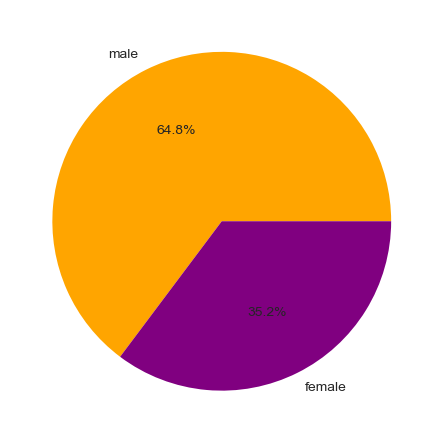

In [294]:
plt.pie(data.value_counts(),labels=data.unique(),colors = ['orange','purple'],autopct='%1.1f%%')
plt.show()

# Visualization Of Survived people according to Gender

among total passesngers 64.8% were males and 35.2% were females

In [295]:
'''from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
le = LabelEncoder()'''

'from sklearn.preprocessing import LabelEncoder\nfrom keras.utils import to_categorical\nle = LabelEncoder()'

In [296]:
#train['Sex'] = le.fit_transform(train['Sex'])
#train['Sex'] = to_categorical(train['Sex'])

In [297]:
survived = train[train['Survived'] == 1]
dead = train[train['Survived'] == 0]

Survived


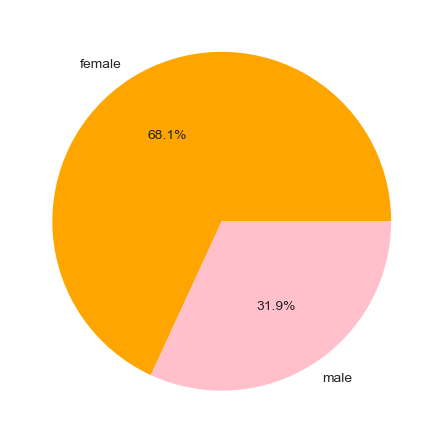

Dead


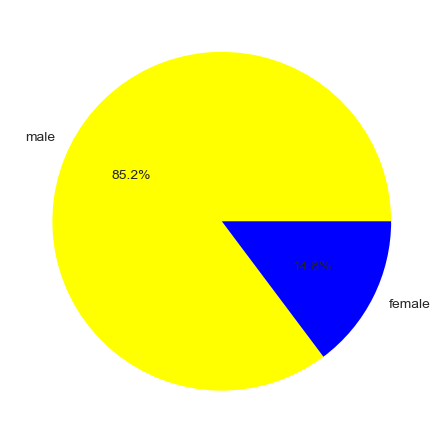

In [300]:
plt.pie(survived['Gender'].value_counts(),labels=survived['Gender'].unique(),colors=['orange','pink'],autopct='%1.1f%%')
print("Survived")
plt.show()
plt.pie(dead['Gender'].value_counts(),labels=dead['Gender'].unique(),colors=['yellow','blue'],autopct='%1.1f%%')
print("Dead")
plt.show()

<Figure size 800x550 with 0 Axes>

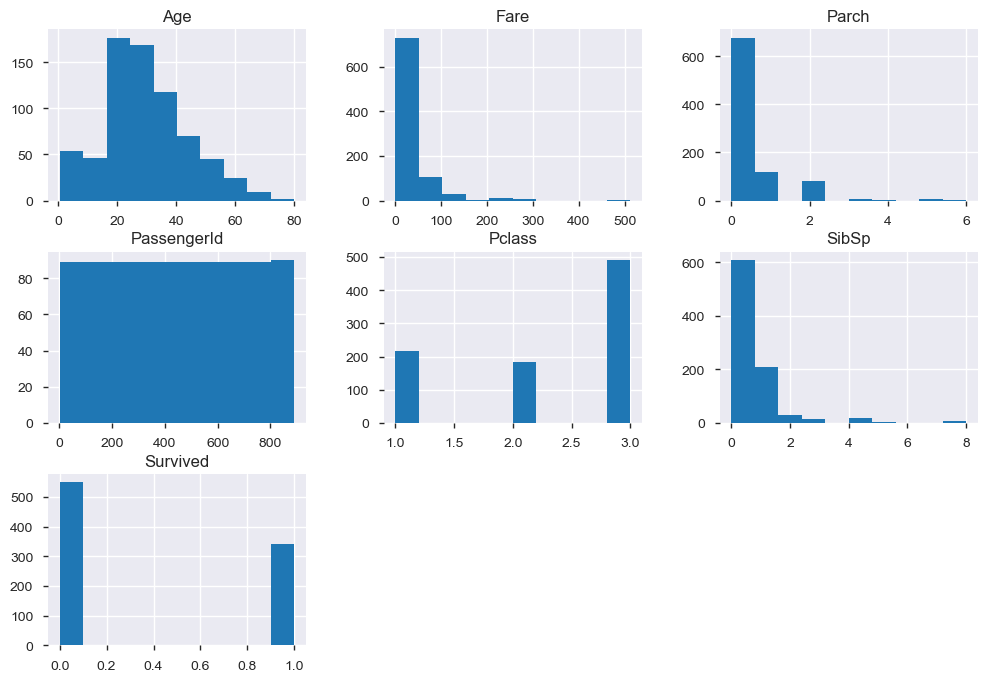

<Figure size 800x550 with 0 Axes>

In [301]:
train.hist(figsize=(12,8))
plt.figure()

The number of males survived are less then females that means gender plays an important role in surviving

In [302]:
train.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [303]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Gender         891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [304]:
train['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

There are 3 classess so now we will see what effect class will have on survival

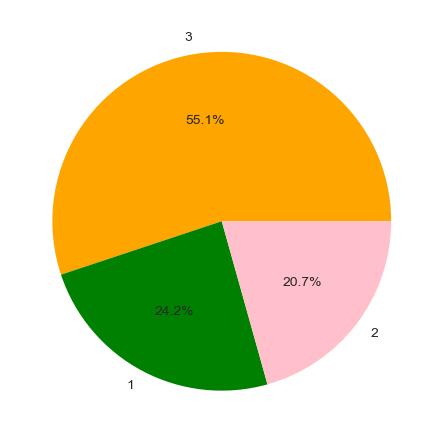

In [305]:
plt.pie(train['Pclass'].value_counts(),labels = train['Pclass'].unique(),colors = ['orange','green','pink'],autopct = '%1.1f%%')
plt.show()

Through analysis we can see more then 50% people belong to class '1'.

# Analyzing survival ratio with class

In [306]:
class_1 = train[train['Pclass']==1]
class_2 = train[train['Pclass']==2]
class_3 = train[train['Pclass']==3]

In [307]:
class_1.shape

(216, 12)

In [308]:
class_1.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
23,24,1,1,"Sloper, Mr. William Thompson",male,28.0,0,0,113788,35.5000,A6,S


In [309]:
class_2.shape

(184, 12)

In [310]:
class_3.shape

(491, 12)

In [311]:
class_1['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [312]:
class_2['Survived'].value_counts()

0    97
1    87
Name: Survived, dtype: int64

In [313]:
class_3['Survived'].value_counts()

0    372
1    119
Name: Survived, dtype: int64

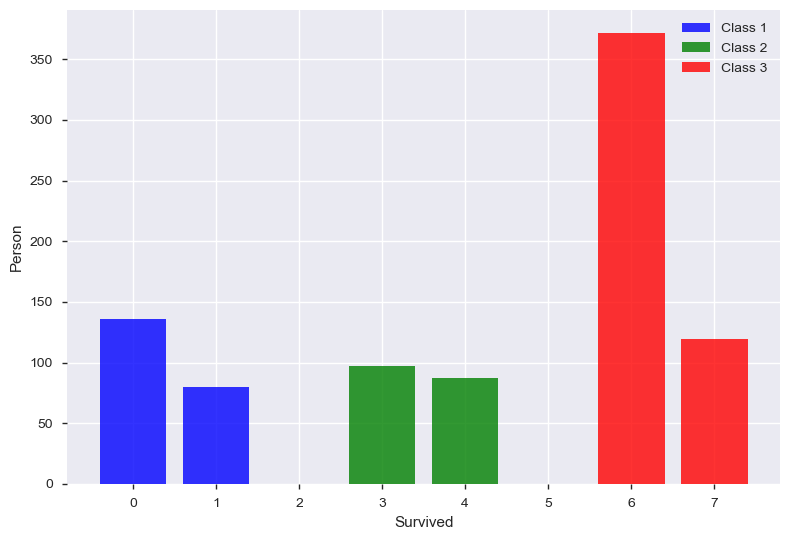

In [314]:
n_groups = 2
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 6
opacity = 0.8

plt1 = plt.bar(index,class_1['Survived'].value_counts(),align='center',color='b',label='Class 1',alpha = opacity)
#plt.bar(survived['Sex'].unique(),survived['Sex'].value_counts(),alpha=0.5,align='center')
#print("Survived")
#plt.show()

plt2 = plt.bar(index + 3,class_2['Survived'].value_counts(),align='center',color = 'g',label='Class 2',alpha = opacity)
plt3 = plt.bar(index +bar_width,class_3['Survived'].value_counts(),align = 'center',color = 'r',label ='Class 3',alpha=opacity)
plt.xlabel('Survived')
plt.ylabel('Person')
#plt.xticks(index + bar_width, ('alive','dead'))
#print("Dead")
plt.legend()

plt.tight_layout()
plt.show()

As we can observe that the class_1

In [315]:
train.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


we will devide the data into two parts survived and not survived

In [316]:
sur = train[train['Survived'] == 1]
ns = train[train['Survived'] == 0]

In [317]:
len(sur),len(ns)

(342, 549)

In [318]:
col = 'Pclass'
v1=sur[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})

In [319]:
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))

In [320]:
v1=v1.sort_values(col)

In [321]:
v2 =ns[col].value_counts().reset_index()
v2 = v2.rename(columns={col:'count','index':col})
v2['percent'] = v2['count'].apply(lambda x:100*x/sum(v2['count']))

In [322]:
index = 0

In [323]:
v1=v1.rename(columns={col:'count','index':col})

In [324]:
v1

,count,count,percent
0,1,136,39.766082
2,2,87,25.438596
1,3,119,34.795322


In [325]:
train.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [326]:
data =  train.groupby(['Pclass'])

In [327]:
data.get_group(2)

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
15,16,1,2,"Hewlett, Mrs. (Mary D Kingcome)",female,55.0,0,0,248706,16.0000,NaN,S
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,21,0,2,"Fynney, Mr. Joseph J",male,35.0,0,0,239865,26.0000,NaN,S
21,22,1,2,"Beesley, Mr. Lawrence",male,34.0,0,0,248698,13.0000,D56,S
...,...,...,...,...,...,...,...,...,...,...,...,...
866,867,1,2,"Duran y More, Miss. Asuncion",female,27.0,1,0,SC/PARIS 2149,13.8583,NaN,C
874,875,1,2,"Abelson, Mrs. Samuel (Hannah Wizosky)",female,28.0,1,0,P/PP 3381,24.0000,NaN,C
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S


In [328]:
pclass1 = data.get_group(1)
pclass2 = data.get_group(2)
pclass3 = data.get_group(3)

In [329]:
survived = pclass1.groupby(['Survived'])
survive1 = survived .get_group(1)
notsurvive1 = survived.get_group(0)

In [330]:
survived = pclass2.groupby(['Survived'])
survive2 = survived .get_group(1)
notsurvive2 = survived.get_group(0)

In [331]:
survived = pclass3.groupby(['Survived'])
survive3 = survived .get_group(1)
notsurvive3 = survived.get_group(0)

In [332]:
pclass1['Survived'].value_counts()

1    136
0     80
Name: Survived, dtype: int64

In [333]:
pclass2['Survived'].value_counts()

0    97
1    87
Name: Survived, dtype: int64

In [334]:
pclass3['Survived'].value_counts()

0    372
1    119
Name: Survived, dtype: int64

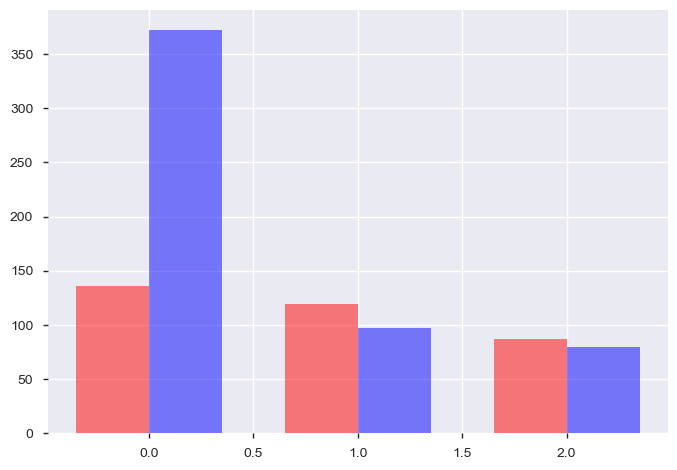

In [335]:
n_groups =3
fig, ax = plt.subplots()
x = np.arange(n_groups)
width = 0.35
plt.bar(x-width/2,sur['Pclass'].value_counts(),width,color='red',alpha=0.5)
plt.bar(x+width/2,ns['Pclass'].value_counts(),width,color= 'blue',alpha= 0.5)
plt.show()


In [336]:
col = 'Pclass'
v1 =  sur[col].value_counts().reset_index()
v1=v1.rename(columns={col:'count','index':col})
v1['percent']=v1['count'].apply(lambda x : 100*x/sum(v1['count']))
v1=v1.sort_values(col)

In [337]:
col = 'Pclass'
v2 =  ns[col].value_counts().reset_index()
v2=v2.rename(columns={col:'count','index':col})
v2['percent']=v2['count'].apply(lambda x : 100*x/sum(v2['count']))
v2=v2.sort_values(col)

In [338]:
v2

,Pclass,count,percent
2,1,80,14.571949
1,2,97,17.668488
0,3,372,67.759563


Blue bar is the one who survived and red one is one for who died , as you can see people from class 1 survived most so class has effect on output variable 

In [339]:
train.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [340]:
train['Age'].value_counts()

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64

In [341]:
train['Age'].unique()

array([22.  , 38.  , 26.  , 35.  ,   nan, 54.  ,  2.  , 27.  , 14.  ,
        4.  , 58.  , 20.  , 39.  , 55.  , 31.  , 34.  , 15.  , 28.  ,
        8.  , 19.  , 40.  , 66.  , 42.  , 21.  , 18.  ,  3.  ,  7.  ,
       49.  , 29.  , 65.  , 28.5 ,  5.  , 11.  , 45.  , 17.  , 32.  ,
       16.  , 25.  ,  0.83, 30.  , 33.  , 23.  , 24.  , 46.  , 59.  ,
       71.  , 37.  , 47.  , 14.5 , 70.5 , 32.5 , 12.  ,  9.  , 36.5 ,
       51.  , 55.5 , 40.5 , 44.  ,  1.  , 61.  , 56.  , 50.  , 36.  ,
       45.5 , 20.5 , 62.  , 41.  , 52.  , 63.  , 23.5 ,  0.92, 43.  ,
       60.  , 10.  , 64.  , 13.  , 48.  ,  0.75, 53.  , 57.  , 80.  ,
       70.  , 24.5 ,  6.  ,  0.67, 30.5 ,  0.42, 34.5 , 74.  ])

In [342]:
train['Pclass'].value_counts().reset_index()

,index,Pclass
0,3,491
1,1,216
2,2,184


In [343]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [344]:
sur['Embarked'].value_counts()

S    217
C     93
Q     30
Name: Embarked, dtype: int64

# Starting Again

First of all we will seprate survivals and dead people list and see what features will effect which feature

In [345]:
data = train

In [346]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
le = LabelEncoder()

We have first consider gender 

In [347]:
data['Gender'] = le.fit_transform(data['Gender'])
data['Gender'] = to_categorical(data['Gender'])
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0.0,35.0,0,0,373450,8.0500,NaN,S


In [348]:
survival =  data[data['Survived']== 1]
not_survival = data[data['Survived'] == 0]

In [349]:
survival.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1.0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1.0,14.0,1,0,237736,30.0708,NaN,C


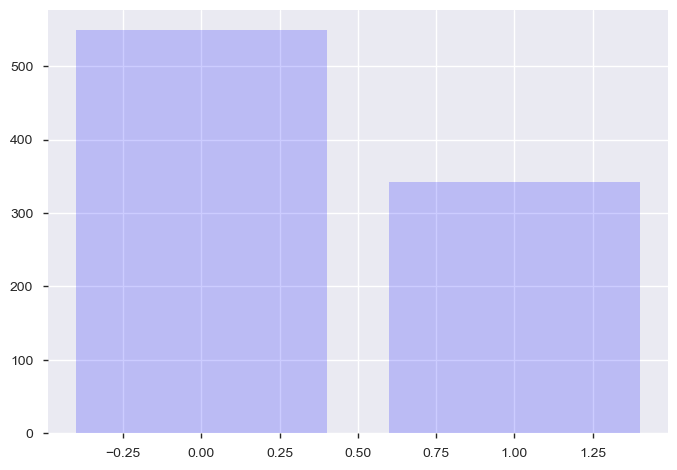

In [350]:
#bar chart of people who survived
plt.bar(data['Survived'].unique(),data['Survived'].value_counts(),color = 'blue',alpha =0.2)
plt.show()

Now we will check every feature that is effecting the data

In [351]:
group = survival['Gender'].value_counts().reset_index()
group = group.rename(columns = {"index" : "Gender" , "Gender" : "Count"})
group = group.sort_values('Gender')

In [352]:
group

,Gender,Count
1,0.0,109
0,1.0,233


In [353]:
group

,Gender,Count
1,0.0,109
0,1.0,233


In [354]:
group1 = not_survival['Gender'].value_counts().reset_index()
group1 = group1.rename(columns = {"index" : "Gender", "Gender" : "Count"})
group1 = group1.sort_values('Gender')

In [355]:
group1.head()

,Gender,Count
0,0.0,468
1,1.0,81


In [356]:
group.head()

,Gender,Count
1,0.0,109
0,1.0,233


In [357]:
len(survival)

342

In [358]:
not_survival['Gender'].value_counts().reset_index()

,index,Gender
0,0.0,468
1,1.0,81


In [359]:
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

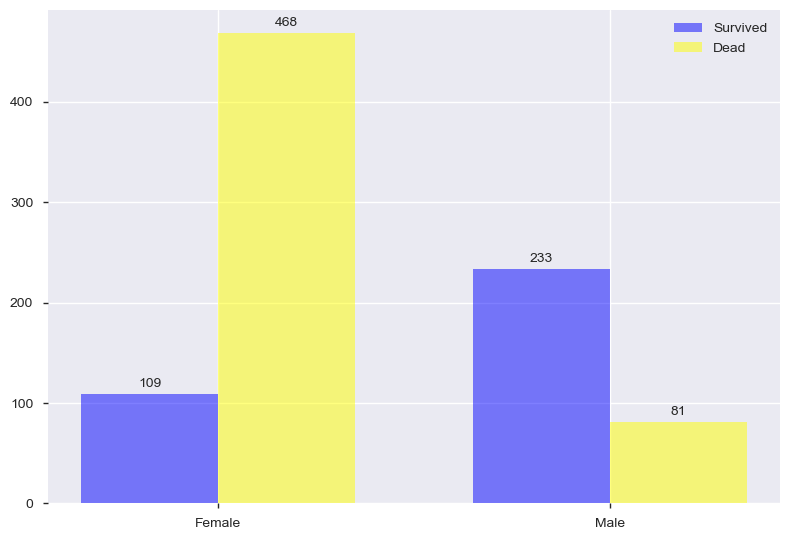

In [360]:
#First we will be looking at the gender
x = np.arange(2)
width = 0.35
f,ax= plt.subplots()
ax1 = plt.bar(x - width/2,group['Count'],width,color = 'blue',alpha = 0.5,label ='Survived')
ax2= plt.bar(x + width/2,group1['Count'],width,color = 'yellow',alpha =0.5,label = 'Dead')
autolabel(ax1)
autolabel(ax2)
ax.set_xticks(x)
ax.set_xticklabels(['Female','Male'])
ax.legend()
f.tight_layout()
plt.show()

As we can see female are most likely to be saved

In [361]:
#Now we will be seeing according to class
Survive_class = survival['Pclass'].value_counts().reset_index()
Survive_class = Survive_class.rename(columns={'index':'Pclass','Pclass':'count'})
Survive_class = Survive_class.sort_values('Pclass')

In [362]:
Survive_class

,Pclass,count
0,1,136
2,2,87
1,3,119


In [363]:
Not_Survive_class = not_survival['Pclass'].value_counts().reset_index()
Not_Survive_class =Not_Survive_class.rename(columns={'index':'Pclass','Pclass':'count'})
Not_Survive_class = Not_Survive_class.sort_values('Pclass')

In [364]:
Not_Survive_class

,Pclass,count
2,1,80
1,2,97
0,3,372


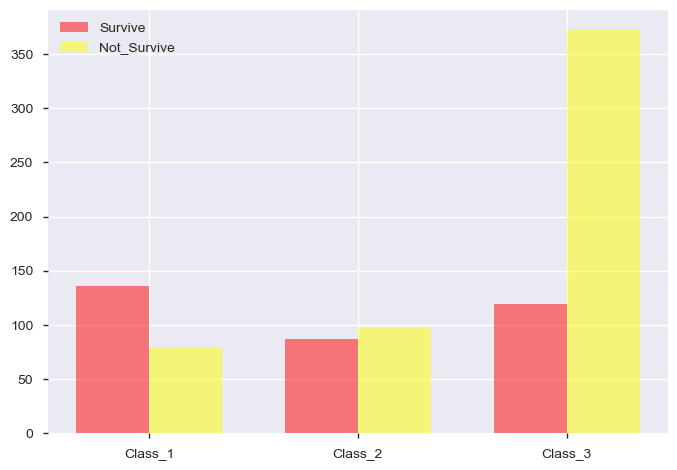

In [365]:
col = 'Pclass'
fig,ax = plt.subplots()
x = np.arange(3)
width =0.35
ax1 = plt.bar(x-width/2,Survive_class['count'],width,alpha=0.5,color = ['red'],label = 'Survive')
ax2 = plt.bar(x+width/2,Not_Survive_class['count'],width,alpha=0.5,color = ['yellow'],label = 'Not_Survive')
ax.set_xticks(x)
ax.set_xticklabels(['Class_1','Class_2','Class_3'])
ax.legend()
f.tight_layout()
plt.show()

In [366]:
Survive_class

,Pclass,count
0,1,136
2,2,87
1,3,119


In [367]:
Not_Survive_class

,Pclass,count
2,1,80
1,2,97
0,3,372


People of Class 1 are likey to be saved more and class 3 are likely to be saved less

In [368]:
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0.0,35.0,0,0,373450,8.0500,NaN,S


In [369]:
#Now we will be seeing according to the embarked 
data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [370]:
#So we have null values 
data['Embarked'].isnull().value_counts()

False    889
True       2
Name: Embarked, dtype: int64

In [371]:
len(data)

891

In [372]:
embr = data

In [373]:
embr.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0.0,35.0,0,0,373450,8.0500,NaN,S


In [374]:
embr = embr.dropna(subset = ['Embarked'])

In [375]:
len(embr)

889

In [376]:
embr['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [377]:
embr['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [378]:
survived = embr[embr['Survived'] == 1]
not_survived = embr[embr['Survived'] == 0]

In [379]:
survived = survived['Embarked'].value_counts().reset_index()
survived = survived.rename(columns = {'index':'Embarked','Embarked':'count'})
survived = survived.sort_values('Embarked')

In [380]:
not_survived = not_survived['Embarked'].value_counts().reset_index()
not_survived = not_survived.rename(columns = {'index':'Embarked','Embarked':'count'})
not_survived = not_survived.sort_values('Embarked')

In [381]:
not_survived

,Embarked,count
1,C,75
2,Q,47
0,S,427


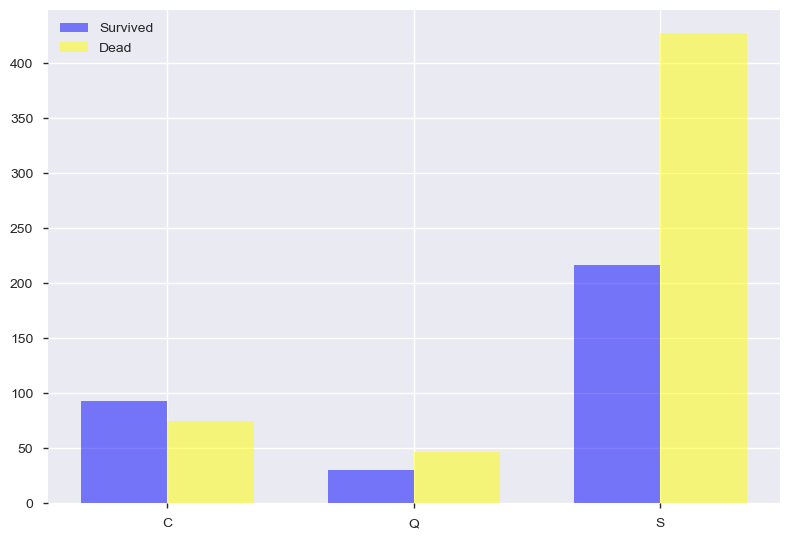

In [382]:
f,ax = plt.subplots()
x = np.arange(3)
width = 0.35
ax1 = plt.bar(x-width/2,survived['count'],width,alpha = 0.5,color = 'blue',label = 'Survived')
ax2 = plt.bar(x+width/2,not_survived['count'],width,alpha = 0.5,color = 'yellow',label = 'Dead')
ax.set_xticks(x)
ax.set_xticklabels(['C','Q','S'])
ax.legend()
f.tight_layout()
plt.show()

As we can observe the class C are most favorable to be rescued 

In [479]:
#Now we will be dealing with SibSp variable
data['SibSp'].value_counts()
min = data['SibSp'].min()
max = data['SibSp'].max()

In [483]:
sibsp = []
sibsb = pd.DataFrame(sibsp)

In [484]:
#Now we will be dealing with SibSp variable

In [486]:
sibsp = pd.DataFrame(sibsp,columns = ['Index','Survive','Dead'])

In [487]:
sibsp['Index'] = np.arange(min,max+1)

In [488]:
Sibsp_ns = not_survival['SibSp'].value_counts().reset_index()
Sibsp_ns = Sibsp_ns.rename(columns = {'index':'SibSp','SibSp': 'count'})
Sibsp_ns = Sibsp_ns.sort_values('SibSp')

In [489]:
Sibsp_s = survival['SibSp'].value_counts().reset_index()
Sibsp_s = Sibsp_s.rename(columns = {'index':'SibSp','SibSp': 'count'})
#Sibsp_s['Index'] = np.arange(min,max+1)
Sibsp_s = Sibsp_s.sort_values('SibSp')

In [490]:
Sibsp_s

,SibSp,count
0,0,210
1,1,112
2,2,13
3,3,4
4,4,3


In [491]:
survival['SibSp'].unique()

array([1, 0, 4, 3, 2], dtype=int64)

In [492]:
class Sibsp:
    def __init__(self,Sibsp,count):
        self.Sibsp = Sibsp
        self.count = count
    def Sibsp():
        return(self.Sibsp)
    def Count():
        return(self.count)

In [493]:
Sibsp_s['count'][0]

210

In [494]:
Sibsp_ns

,SibSp,count
0,0,398
1,1,97
3,2,15
4,3,12
2,4,15
6,5,5
5,8,7


In [495]:
ns = Sibsp(Sibsp_ns['SibSp'],Sibsp_ns['count'])
s = Sibsp(Sibsp_s['SibSp'],Sibsp_s['count'])

In [496]:
print(s.count[3])

4


In [497]:
sc = 0
nsc = 0

In [510]:
for ind in range(len(sibsp)):
    try:
        if(sibsp['Index'][ind] == s.Sibsp[sc]):
            #print('here')
            sibsp['Survive'][ind] = int(s.count[sc])
            sc +=1
    except:
        pass
    try:
        if(sibsp['Index'][ind] == ns.Sibsp[nsc]):
            sibsp['Dead'][ind] = int(ns.count[nsc])
            nsc +=1
    except:
        pass
    #print(sc)
    #print(ind)

C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


In [516]:
sibsp

,Index,Survive,Dead
0,0,210,398
1,1,112,97
2,2,13,15
3,3,4,12
4,4,3,15
5,5,NaN,5
6,6,NaN,NaN
7,7,NaN,NaN
8,8,NaN,7


In [512]:
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0.0,35.0,0,0,373450,8.0500,NaN,S


In [513]:
Sibsp_ns = not_survival['SibSp'].value_counts().reset_index()
Sibsp_ns = Sibsp_ns.rename(columns = {'index':'SibSp','SibSp': 'count'})
Sibsp_ns = Sibsp_ns.sort_values('SibSp')

In [514]:
len(Sibsp_ns)

7

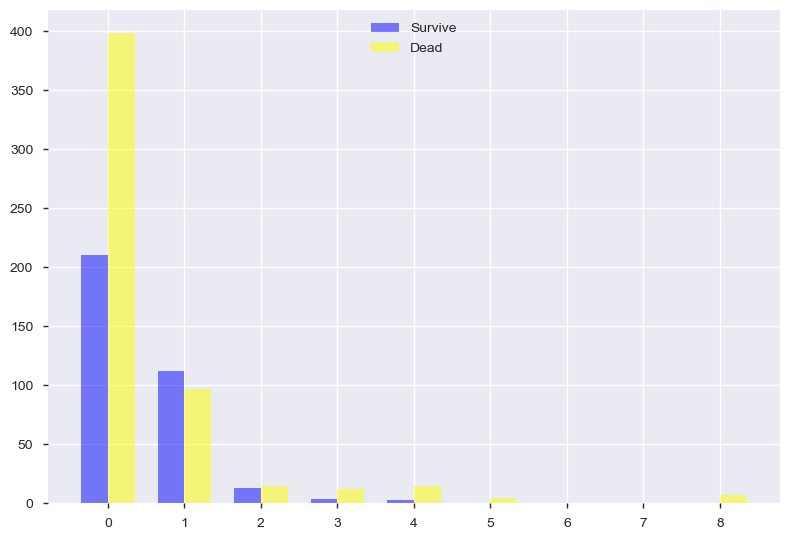

In [515]:
f,ax = plt.subplots()
width = 0.35
x = np.arange(len(sibsp['Index']))
ax1 = plt.bar(x-width/2,sibsp['Survive'],width,label = 'Survive',alpha =0.5,color = 'blue')
ax2 = plt.bar(x+width/2,sibsp['Dead'],width,label = 'Dead',alpha =0.5,color = 'yellow')
ax.set_xticks(np.arange(min,max+1))
ax.set_xticklabels(np.arange(min,max+1))
ax.legend()
f.tight_layout()
plt.show()

The graph shows that the more members in family the low the rate of survival

In [991]:
survival.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",1.0,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1.0,14.0,1,0,237736,30.0708,NaN,C


In [992]:
#will do same as we did for spsib
#first filter out null values
train['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

In [993]:
age_filter = train.dropna(subset = ['Age'])

In [994]:
age_filter['Age'].isnull().value_counts()

False    714
Name: Age, dtype: int64

In [1004]:
agesurvival = age_filter[age_filter['Survived']==1]
agesurvival = agesurvival['Age'].value_counts().reset_index()
agesurvival = agesurvival.rename(columns = {'index':'Age','Age':'count'})
agesurvival = agesurvival.sort_values('Age').reset_index()
agesurvival['alive_per'] = agesurvival['count'].apply(lambda x :x/sum(agesurvival['count'])*100)
agesurvival = agesurvival.drop(['index'],axis =1)

In [1005]:
agesurvival.head()

,Age,count,alive_per
0,0.42,1,0.344828
1,0.67,1,0.344828
2,0.75,2,0.689655
3,0.83,2,0.689655
4,0.92,1,0.344828


In [1006]:
agesurvival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 3 columns):
Age          65 non-null float64
count        65 non-null int64
alive_per    65 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.6 KB


In [1008]:
agesurvivalnot = age_filter[age_filter['Survived']==0]
agesurvivalnot = agesurvivalnot['Age'].value_counts().reset_index()
agesurvivalnot = agesurvivalnot.rename(columns = {'index':'Age','Age':'count'})
agesurvivalnot = agesurvivalnot.sort_values('Age').reset_index()
agesurvivalnot['dead_per'] = agesurvivalnot['count'].apply(lambda x: x/sum(agesurvivalnot['count'])*100)
agesurvivalnot = agesurvivalnot.drop(['index'],axis =1)

In [1009]:
agesurvivalnot.head()

,Age,count,dead_per
0,1.0,2,0.471698
1,2.0,7,1.650943
2,3.0,1,0.235849
3,4.0,3,0.707547
4,6.0,1,0.235849


In [1011]:
ages = age_filter['Age'].value_counts().reset_index()
ages = ages.rename(columns = {'index':'Age','Age': 'count'})
ages = ages.sort_values('Age').reset_index()
ages['percent'] = ages['count'].apply(lambda x: 100*x /sum(ages['count']))
ages = ages.drop(['index'],axis =1)

In [1013]:
ages = pd.DataFrame(ages,columns = ['Age','count','percent','alive','aliveper','dead','deadper'])

In [1014]:
ages.head()

,Age,count,percent,alive,aliveper,dead,deadper
0,0.42,1,0.140056,NaN,NaN,NaN,NaN
1,0.67,1,0.140056,NaN,NaN,NaN,NaN
2,0.75,2,0.280112,NaN,NaN,NaN,NaN
3,0.83,2,0.280112,NaN,NaN,NaN,NaN
4,0.92,1,0.140056,NaN,NaN,NaN,NaN


In [980]:
class Entity:
    def __init__(self,main_entity,count,per):
        self.main_entity = main_entity
        self.count = count
        self.per = per
    def Main_entity(self):
        return(self.main_entity)
    def Count(self):
        return(self.count)
    def Percent(self):
        return(self.per)

In [981]:
class Age(Entity):
    def __init__(self,numage,count,per):
        super().__init__(numage,count)
        self.per = per
    def Percent(self):
        return(self.per)

In [982]:
ages.head()

,Age,count,percent,alive,aliveper,dead,deadper
0,0.42,1,0.140056,1.0,0.0,NaN,NaN
1,0.67,1,0.140056,1.0,0.0,NaN,NaN
2,0.75,2,0.280112,2.0,0.0,NaN,NaN
3,0.83,2,0.280112,2.0,0.0,NaN,NaN
4,0.92,1,0.140056,1.0,0.0,NaN,NaN


In [1015]:
agesurvival.head()

,Age,count,alive_per
0,0.42,1,0.344828
1,0.67,1,0.344828
2,0.75,2,0.689655
3,0.83,2,0.689655
4,0.92,1,0.344828


In [1016]:
sur_age = Entity(agesurvival['Age'],agesurvival['count'],agesurvival['alive_per'])
not_sur_age = Entity(agesurvivalnot['Age'],agesurvivalnot['count'],agesurvivalnot['dead_per'])

In [1022]:
ages['Age'][0]

0.42

In [1020]:
sur_age.Main_entity()[9]

5.0

In [1045]:
sc = 0
nsc = 0
for ind in range(len(ages)):
    try:
        if(ages['Age'][ind] == sur_age.Main_entity()[sc]):
            ages['alive'][ind] = sur_age.Count()[sc]
            ages['aliveper'][ind] = sur_age.Percent()[sc]
            sc = sc+1
    except:
        pass
    try:
        if(ages['Age'][ind] == not_sur_age.Main_entity()[nsc]):
            ages['dead'][ind] = not_sur_age.Count()[nsc]
            ages['deadper'][ind] = not_sur_age.Percent()[nsc]
            nsc +=1
    except:
        pass

C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  

In [1046]:
ages

,Age,count,percent,alive,aliveper,dead,deadper
0,0.42,1,0.140056,1.0,0.344828,NaN,NaN
1,0.67,1,0.140056,1.0,0.344828,NaN,NaN
2,0.75,2,0.280112,2.0,0.689655,NaN,NaN
3,0.83,2,0.280112,2.0,0.689655,NaN,NaN
4,0.92,1,0.140056,1.0,0.344828,NaN,NaN
...,...,...,...,...,...,...,...
83,70.00,2,0.280112,NaN,NaN,2.0,0.471698
84,70.50,1,0.140056,NaN,NaN,1.0,0.235849
85,71.00,2,0.280112,NaN,NaN,2.0,0.471698
86,74.00,1,0.140056,NaN,NaN,1.0,0.235849


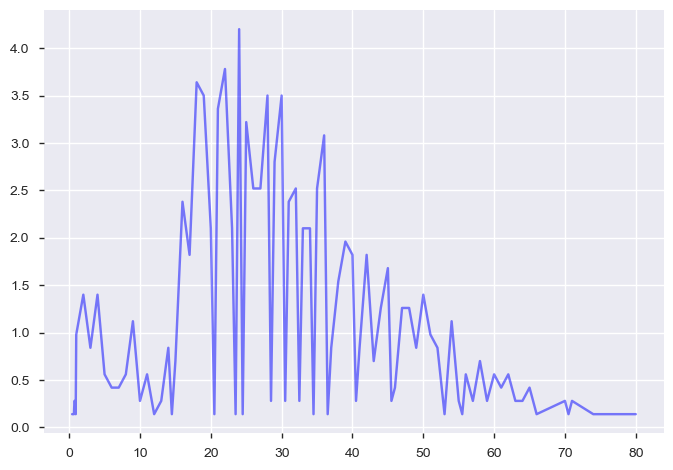

<Figure size 800000x1.5e+06 with 0 Axes>

In [1048]:
#Overall people of diffrent ages
plt.plot(ages['Age'],ages['percent'],color = 'blue',alpha =0.5)
#plt.plot(ages['Age'],ages['aliveper'],color = 'red',alpha =0.5)
#plt.plot(ages['Age'],ages['deadper'],color = 'green',alpha =0.5)
#plt.plot(not_survival_age['Age'].unique(),not_survival_age['Age'].value_counts(),color = 'red',alpha =0.5)
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
#axes.set_ylim([survival_age['Age'].value_counts().min(),survival_age['Age'].value_counts().max()])
#axes.set_xlim(0,50)
#axes.set_ylim(0,90)
plt.figure(figsize=(8000, 15000))
plt.show()

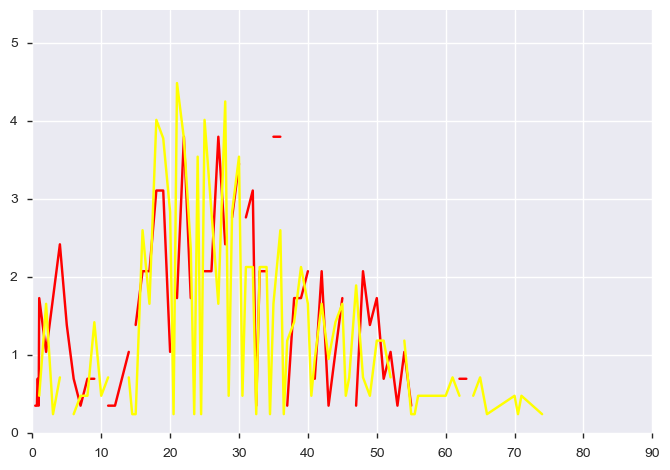

<Figure size 800000x1.5e+06 with 0 Axes>

In [1059]:
#plt.plot(ages['Age'],ages['percent'],color = 'blue',alpha =0.5)
plt.plot(ages['Age'],ages['aliveper'],color = 'red')
plt.plot(ages['Age'],ages['deadper'],color = 'yellow')
#plt.plot(not_survival_age['Age'].unique(),not_survival_age['Age'].value_counts(),color = 'red',alpha =0.5)
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
#axes.set_ylim([survival_age['Age'].value_counts().min(),survival_age['Age'].value_counts().max()])
axes.set_xlim(0,90)
#axes.set_ylim(0,90)
plt.figure(figsize=(8000, 15000))
plt.show()

Above graph is for the people with ages who survived as we can see the people between 0-10 were saved most prefernce was given too old people and children 

In [1060]:
train.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0.0,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1.0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",1.0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1.0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",0.0,35.0,0,0,373450,8.0500,NaN,S


Now we will consedring the Parch feature , Parch is the number of family members, parch is number of parent children person has 

In [1068]:
#Checking the null values
train['Parch'].isnull().value_counts()
#so there are no null values 

False    891
Name: Parch, dtype: int64

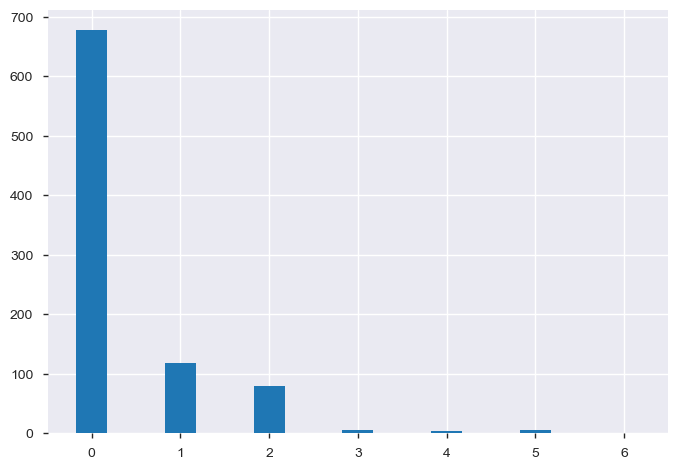

In [1070]:
#Total Parch visualization
plt.bar(train['Parch'].unique(),train['Parch'].value_counts(),width = 0.35)
plt.show()

In [1078]:
#survived and unsurvived parch values
parch_s = survival['Parch'].value_counts().reset_index()
parch_s = parch_s.rename(columns = {"index":'Parch','Parch':'count'})

In [1079]:
parch_s

,Parch,count
0,0,233
1,1,65
2,2,40
3,3,3
4,5,1


In [1089]:
parch_ns = not_survival['Parch'].value_counts().reset_index()
parch_ns = parch_ns.rename(columns = {"index":'Parch','Parch':'count'})
parch_ns = parch_ns.sort_values('Parch').reset_index()
parch_ns = parch_ns.drop(['index'],axis = 1)

In [1090]:
parch_ns

,Parch,count
0,0,445
1,1,53
2,2,40
3,3,2
4,4,4
5,5,4
6,6,1


In [1099]:
cparch = np.arange(train['Parch'].min(),train['Parch'].max()+1)
cparch = pd.DataFrame(cparch,columns = ['Parch'])
cparch = pd.DataFrame(cparch , columns = ['Parch','Survived','Dead'])

In [1120]:
s = 0
ns = 0
for ind in range(len(cparch)):
    try:
        if(cparch['Parch'][ind] == parch_s['Parch'][s]):
            cparch['Survived'][ind] = parch_s['count'][s]
            s +=1
    except:
        pass
    try:
        if(cparch['Parch'][ind] == parch_ns['Parch'][ns]):
            cparch['Dead'][ind] = parch_ns['count'][ns]
            ns +=1
    except:
        pass

C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\shiza.abid\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [1121]:
cparch

,Parch,Survived,Dead
0,0,233.0,445.0
1,1,65.0,53.0
2,2,40.0,40.0
3,3,3.0,2.0
4,4,NaN,4.0
5,5,1.0,4.0
6,6,NaN,1.0


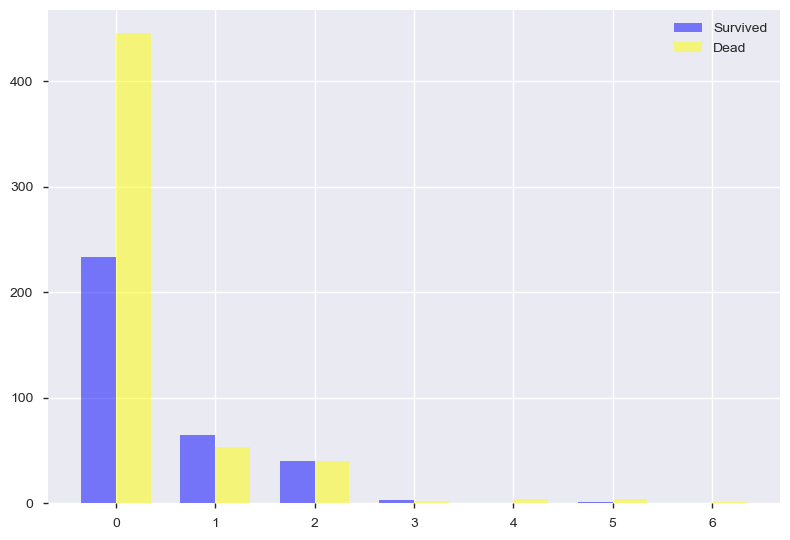

In [1160]:
f,ax = plt.subplots()
width = 0.35
x = np.arange(len(cparch))
ax1 = plt.bar(x-width/2,cparch['Survived'],width,alpha =0.5,color = 'blue',label = 'Survived')
ax2 = plt.bar(x+width/2,cparch['Dead'],width,alpha =0.5,color = 'yellow',label = 'Dead')
ax.set_xticks(cparch['Parch'])
ax.set_xticklabels(x)
ax.legend(loc = 'upper right')
f.tight_layout()
plt.show()

From parch we calculate that most people are alone and people with 0,1,2 memebers have probablity to be saved 

In [1161]:
train.corr()

,PassengerId,Survived,Pclass,Gender,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,-0.042939,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,0.543351,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.131900,-0.369226,0.083081,0.018443,-0.549500
Gender,-0.042939,0.543351,-0.131900,1.000000,-0.093254,0.114631,0.245489,0.182333
Age,0.036847,-0.077221,-0.369226,-0.093254,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,0.114631,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,0.245489,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.182333,0.096067,0.159651,0.216225,1.000000
